# Семинар №8

Pandas. Numpy. Визуализации.

# Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Python/Курс по Python/'

/content/drive/My Drive/Python/Курс по Python


In [ ]:
!pip install pandas==1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires pandas>=1.5.3, but you have pandas 1.5.0 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.0 which is incompatible.
ibis-framework 9.2.0 requires pandas<3,>=1.5.3, but you have pandas 1.5.0 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.0 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.0 which is incompatible.
xarray 2024.9.0 requires pandas>

In [ ]:
import pandas as pd

### Загрузка таблицы из файла и описание переменных
А теперь давайте загрузим какую-нибудь реальную базу данных из файла. Библиотека `pandas` достаточно гибкая, она позволяет загружать данные из файлов разных форматов. Пока остановимся на самом простом – файле csv, что расшифровывается как *comma separated values*. Столбцы в таком файле по умолчанию отделяются друг от друга запятой. Например, такая таблица

In [ ]:
pd.DataFrame([[1, 4, 9], [4, 8, 6]])

,0,1,2
0,1,4,9
1,4,8,6


сохраненная в формате csv без названий строк и столбцов будет выглядеть так:

Но разделитель столбцов в таблице может быть и другим, например, точкой с запятой:

В таких случаях нам потребуется дополнительно выставлять параметр `sep = ";"`, чтобы Python понимал, как правильно отделять один столбец от другого. Посмотрим на примере двух файлов: `test1.xlsx` и `test2.csv`.

In [ ]:
# загружаем test1.xlsx – все нормально
d1 = pd.read_excel("test1.xlsx")
d1

,A,B,C
0,1,5,10
1,2,6,11
2,3,7,12


In [ ]:
# загружаем test2.csv – тоже все хорошо
d2 = pd.read_csv("test2.csv")
d2

,A,B,C
0,2,2.5,1.8
1,3,4.2,0.0
2,4,4.3,1.6


Теперь поэкспериментируем: откроем файл `test2.csv` (можно в блокноте, а можно прямо в Jupyter, он открывает текстовые файлы) и изменим разделитель столбцов. Заменим запятые на точки с запятой:

```
A;B;C
2;2.5;1.8
3;4.2;0
4;4.3;1.6
```

In [ ]:
# теперь при загрузке получим что-то не то
pd.read_csv("test2.csv")

,A;B;C
0,2;2.5;1.8
1,3;4.2;0
2,4;4.3;1.6


Это из-за разделителя столбцов по умолчанию (запятая), укажем явно, что теперь это точка с запятой:

In [ ]:
# все хорошо
pd.read_csv("test2.csv", sep = ";")

,A,B,C
0,2,2.5,1.8
1,3,4.2,0.0
2,4,4.3,1.6


Если мы при этом еще изменим десятичный разделитель в дробях, нас тоже будут ожидать странности:

```
A;B;C
2;2,5;1,8
3;4,2;0
4;4,3;1,6
```

In [ ]:
# визуально все так же
dd = pd.read_csv("test2.csv", sep = ";")
dd

,A,B,C
0,2,"2,5","1,8"
1,3,"4,2",0
2,4,"4,3","1,6"


In [ ]:
dd.info() # тип object, не float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
A    3 non-null int64
B    3 non-null object
C    3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [ ]:
# изменим десятичный разделитель
dd = pd.read_csv("test2.csv", sep = ";", decimal = ",")
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
A    3 non-null int64
B    3 non-null float64
C    3 non-null float64
dtypes: float64(2), int64(1)
memory usage: 152.0 bytes


При загрузке файла пропишем путь к нему внутри функции `read_csv()` из библиотеки `pandas`. Плюс, сделаем так, чтобы первый столбец (с индексом 0) был использован в качестве названий строк (строки будут иметь не номер от 0 до N, а названия, которые мы захотим, важно только, чтобы они все были уникальными, без повторов):

In [ ]:
df = pd.read_csv("scores.csv", index_col = 0)

Иногда такой подход может быть полезен. Представьте, что все переменные в таблице, кроме *id*, измерены в количественной шкале, и мы планируем реализовать на них статистический метод, который работает исключительно с числовыми данными. Если мы просто выкинем столбец с *id*, мы потеряем информацию о наблюдении, если мы его оставим, нам придется собирать в отдельную таблицу показатели, к которым будем применять метод, так как сохраненный в исходной таблице текст будет мешать. Если же мы назовем строки в соответствии с *id*, мы убьем сразу двух зайцев: избавимся от столбца с текстом и не потеряем информацию о наблюдении (код, имя респондента, название страны и прочее).

В файле `scores.csv` оценки студентов по ряду курсов. Посмотрим на датафрейм:

In [ ]:
df

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


In [ ]:
# import pandas as pd
# df = pd.DataFrame([[1, 4, 9], [4, 8, 6]], columns = ['col1', 'col2', 'col3'], index = ['id1', 'id2'])
# list(df.columns)

In [ ]:
# type(df.index)

Так как в нашем случае таблица не очень большая, Python вывел её на экран полностью. Если строк или столбцов было бы слишком много, Python вывел бы несколько первых и последних, а в середине бы поставил многоточие.

**Описание показателей (переменных):**

* `id` – номер студенческого билета;
* `catps` – оценка по курсу *Категории политической науки*;
* `mstat` – оценка по курсу *Математика и статистика*;
* `soc` – оценка по курсу *Социология*;
* `econ` – оценка по курсу *Экономика*;
* `eng` – оценка по курсу *Английский язык*;
* `polth` – оценка по курсу *История политических учений*;
* `mstat2` – оценка по курсу *Математика и статистика (часть 2)*;
* `phist` – оценка по курсу *Политическая история*;
* `law` – оценка по курсу *Право*;
* `phil` – оценка по курсу *Философия*;
* `polsoc` – оценка по курсу *Политическая социология*;
* `ptheo` – оценка по курсу *Политическая теория*;
* `preg` – оценка по курсу *Политическая регионалистика*;
* `compp` – оценка по курсу *Сравнительная политика*;
* `game` – оценка по курсу *Теория игр*;
* `wpol` – оценка по курсу *Мировая политика и международные отношения*;
* `male` – пол (1 – мужской, 0 – женский).

Получим сводную информацию по таблице:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   catps   60 non-null     int64  
 1   mstat   60 non-null     int64  
 2   soc     60 non-null     int64  
 3   econ    60 non-null     int64  
 4   eng     60 non-null     int64  
 5   polth   60 non-null     int64  
 6   mstat2  60 non-null     int64  
 7   phist   59 non-null     float64
 8   law     60 non-null     int64  
 9   phil    60 non-null     int64  
 10  polsoc  60 non-null     int64  
 11  ptheo   58 non-null     float64
 12  preg    60 non-null     int64  
 13  compp   57 non-null     float64
 14  game    60 non-null     int64  
 15  wpol    60 non-null     int64  
 16  male    60 non-null     int64  
dtypes: float64(3), int64(14)
memory usage: 8.4+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `df` является объектом `DataFrame`. Во-вторых, он вывел число строк (60 entries). В-третьих, он вывел число столбцов (total 17 columns). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы non-null – это всё, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице есть столбцы, которые заполнены не полностью.

Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [ ]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000,60.000000,58.000000,60.000000,57.000000,60.000000,60.000000,60.000000
mean,6.700000,7.466667,7.216667,6.116667,8.350000,6.600000,7.033333,5.830508,6.866667,5.966667,7.183333,5.603448,6.700000,5.631579,6.250000,7.566667,0.450000
std,1.417804,1.578099,1.208608,1.718214,0.971195,1.638519,1.707081,1.662492,1.213856,1.850027,1.589069,1.413465,1.356716,1.422166,1.781496,1.430499,0.501692
min,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.000000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,4.750000,6.000000,4.250000,6.000000,4.000000,5.000000,7.000000,0.000000
50%,7.000000,7.000000,7.000000,6.000000,8.000000,6.000000,7.000000,6.000000,7.000000,5.500000,7.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.250000,9.000000,8.000000,7.000000,9.000000,8.000000,8.000000,7.000000,8.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.250000,8.250000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


В случае количественных показателей этот метод возвращает таблицу с основными описательными статистиками:

* `count` – число непустых (заполненных) значений
* `mean` – среднее арифметическое
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения)
* `min` – минимальное значение
* `max` – максимальное значение
* `25%` – нижний квартиль (значение, которое 25% значений не превышают)
* `50%` – медиана (значение, которое 50% значений не превышают)
* `75%` – верхний квартиль (значение, которое 75% значений не превышают)

### Series: столбец в датафрейме

Посмотрим на структуру таблицы более внимательно. Выберем первый столбец `catps`:

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df['catps']

,catps
id,
М141БПЛТЛ024,7
М141БПЛТЛ031,8
М141БПЛТЛ075,9
М141БПЛТЛ017,9
М141БПЛТЛ069,10
М141БПЛТЛ072,10
М141БПЛТЛ020,8
М141БПЛТЛ026,7
М141БПЛТЛ073,7


Столбец датафрейма `df` имеет особый тип *Series*. Внешне *Series* отличается от обычного списка значений, потому что, во-первых, при вызове столбца на экран выводятся не только сами элементы, но их номер (номер строки), а во-вторых, на экран выводится строка с названием столбца (`Name: id`) и его тип (`dtype: object`, текстовый). Первая особенность роднит *Series* со словарями: он представляет собой пары *ключ-значение*, то есть *номер-значение*. Вторая особенность роднит *Series* с массивами `numpy`: элементы обычно должны быть одного типа.

In [ ]:
# df = pd.DataFrame([[1,2,3], [4,5,6]], columns = ['col1', 'col2', 'col3'], index = ['id1', 'id2'] )
# df.index = ['id3', 'id4']
# df

In [ ]:
# for col in df.columns:
#   print(col)

In [ ]:
# df.index

### Операции с таблицами

Можно вывести первые или последние строки таблицы, используя методы `.head()` и `.tail()`.

In [ ]:
df.head()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [ ]:
df.tail()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ043,5,5,6,5,8,5,6,5.0,6,4,5,4.0,5,NaN,4,6,0
М141БПЛТЛ084,6,7,8,4,8,5,5,NaN,8,4,4,4.0,4,4.0,6,7,1
М141БПЛТЛ005,5,7,5,5,7,4,7,4.0,5,4,5,5.0,4,4.0,4,8,1
М141БПЛТЛ044,4,5,7,4,6,4,4,5.0,4,4,4,4.0,6,NaN,5,5,1
13051038,5,4,4,4,9,5,5,5.0,5,4,4,NaN,7,4.0,4,4,1


**Внимание:** это просто первые и последние строки таблицы «как есть». Никакой сортировки не происходит!

По умолчанию эти методы выводят пять строк, но при желании это легко изменить. Достаточно в скобках указать желаемое число строк.

In [ ]:
df.head(10) # первые 10 строк

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Когда таблица большая, увидеть все столбцы разом не получится. Поэтому полезно знать, как получить список названий столбцов.

In [ ]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Обратите внимание: полученный объект не является обычным списком:

In [ ]:
type(df.columns) # это Index из pandas

pandas.core.indexes.base.Index

Чтобы получить список названий, достаточно сконвертировать тип с помощью привычного `list()`:

In [ ]:
c = list(df.columns)
print(c)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


Аналогичная история со строками:

In [ ]:
df.index

Index(['М141БПЛТЛ024', 'М141БПЛТЛ031', 'М141БПЛТЛ075', 'М141БПЛТЛ017',
       'М141БПЛТЛ069', 'М141БПЛТЛ072', 'М141БПЛТЛ020', 'М141БПЛТЛ026',
       'М141БПЛТЛ073', 'М141БПЛТЛ078', 'М141БПЛТЛ060', 'М141БПЛТЛ040',
       'М141БПЛТЛ065', 'М141БПЛТЛ053', 'М141БПЛТЛ015', 'М141БПЛТЛ021',
       'М141БПЛТЛ018', 'М141БПЛТЛ039', 'М141БПЛТЛ036', 'М141БПЛТЛ049',
       '6114043', 'М141БПЛТЛ048', 'М141БПЛТЛ034', 'М141БПЛТЛ045',
       'М141БПЛТЛ033', 'М141БПЛТЛ083', 'М141БПЛТЛ008', 'М141БПЛТЛ001',
       'М141БПЛТЛ038', 'М141БПЛТЛ052', 'М141БПЛТЛ011', 'М141БПЛТЛ004',
       'М141БПЛТЛ010', 'М141БПЛТЛ071', 'М141БПЛТЛ035', 'М141БПЛТЛ030',
       'М141БПЛТЛ070', 'М141БПЛТЛ051', 'М141БПЛТЛ046', 'М141БПЛТЛ047',
       'М141БПЛТЛ063', 'М141БПЛТЛ029', 'М141БПЛТЛ064', 'М141БПЛТЛ076',
       'М141БПЛТЛ062', 'М141БПЛТЛ074', '130232038', 'М141БПЛТЛ023',
       'М141БПЛТЛ054', 'М141БПЛТЛ012', 'М141БПЛТЛ006', 'М141БПЛТЛ055',
       'М141БПЛТЛ007', 'М141БПЛТЛ050', 'М141БПЛТЛ066', 'М141БПЛТЛ043',
       'М141БП

**Важно:** датафреймы являются изменяемой структурой данных (как списки). Поэтому, применяя некоторые методы к объекту типа `DataFrame` или внося какие-то изменения в ссылку на него, мы меняем исходный датафрейм, и к этому надо быть готовым. Если вы не планируете вносить изменения в исходную базу, имеет смысл сделать её копию и работать с ней. Например, вот так:

In [ ]:
# метод copy
df_new = df.copy()

**Обратите внимание:** создать копию обычным присваиванием не получится, код вида `df_new = df` создаст новую ссылку на датафрейм, но не новый датафрейм. Поэтому при изменении `df_new` база `df` также изменится (как и списки).

Однако это касается не всех преобразований, многие методы для датафреймов уже устроены так, что они возвращают измененную копию датафрейма и не изменяют исходный датафрейм. Чтобы изменить исходный датафрейм, можно добавить аргумент `inplace = True`, он есть у многих методов.

### Выбор столбцов и строк таблицы

**Выбор столбцов по названию**

Часто удобнее всего выбирать столбец по названию. Для этого достаточно указать название столбца в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [ ]:
df['mstat']

,mstat
id,
М141БПЛТЛ024,9
М141БПЛТЛ031,10
М141БПЛТЛ075,9
М141БПЛТЛ017,9
М141БПЛТЛ069,10
М141БПЛТЛ072,9
М141БПЛТЛ020,7
М141БПЛТЛ026,10
М141БПЛТЛ073,9


Ещё столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку:

In [ ]:
df.mstat

,mstat
id,
М141БПЛТЛ024,9
М141БПЛТЛ031,10
М141БПЛТЛ075,9
М141БПЛТЛ017,9
М141БПЛТЛ069,10
М141БПЛТЛ072,9
М141БПЛТЛ020,7
М141БПЛТЛ026,10
М141БПЛТЛ073,9


Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет.

Если нам нужно выбрать более одного столбца, то названия столбцов указываются внутри списка – появляются двойные квадратные скобки:

In [ ]:
df[["soc", "polsoc"]]

,soc,polsoc
id,,
М141БПЛТЛ024,8,9
М141БПЛТЛ031,10,10
М141БПЛТЛ075,9,9
М141БПЛТЛ017,8,9
М141БПЛТЛ069,10,9
М141БПЛТЛ072,8,9
М141БПЛТЛ020,7,9
М141БПЛТЛ026,8,8
М141БПЛТЛ073,8,9


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:    

In [ ]:
# df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9],[10,11,12]], columns = ['col1', 'col2','col3'], index = ['id1', 'id2', 'id3','id4'])
# df

In [ ]:
# df.iloc[[1,3],1]

In [ ]:
# df.iloc[[1,3]]

In [ ]:
# df[['col1', 'col2']]

In [ ]:
df.loc[:, 'econ' : 'law']

,econ,eng,polth,mstat2,phist,law
id,,,,,,
М141БПЛТЛ024,8,9,8,10,8.0,7
М141БПЛТЛ031,10,10,10,10,9.0,9
М141БПЛТЛ075,10,9,10,9,8.0,9
М141БПЛТЛ017,8,9,9,10,6.0,9
М141БПЛТЛ069,10,10,10,9,8.0,8
М141БПЛТЛ072,10,9,8,9,8.0,8
М141БПЛТЛ020,6,9,10,8,8.0,7
М141БПЛТЛ026,7,10,7,9,8.0,8
М141БПЛТЛ073,8,9,8,9,8.0,8


Откуда в квадратных скобках взялось двоеточие? Дело в том, что метод `.loc` – более универсальный, и позволяет выбирать не только столбцы, но и строки. При этом нужные строки указываются на первом месте, а столбцы – на втором. Когда мы пишем `.loc[:, 1]`, мы сообщаем Python, что нам нужны все строки (`:`) и столбцы, начиная с `Econ` и до `Law` включительно.

**Внимание:** выбор столбцов по названиям через двоеточие очень напоминает срезы (*slices*) в списках. Но есть важное отличие. В случае текстовых названий, оба конца среза (левый и правый) включаются. Если бы срезы по названиям были бы устроены как срезы по числовым индексам, код выше выдавал бы столбцы с `Econ` и до `Phist`, не включая колонку `Law`, так как в обычных срезах правый конец исключается.

**Выбор столбцов по номеру**

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc`:

In [ ]:
# df

In [ ]:
# df.loc['id4', 'col3']

In [ ]:
df.mstat

,mstat
id,
М141БПЛТЛ024,9
М141БПЛТЛ031,10
М141БПЛТЛ075,9
М141БПЛТЛ017,9
М141БПЛТЛ069,10
М141БПЛТЛ072,9
М141БПЛТЛ020,7
М141БПЛТЛ026,10
М141БПЛТЛ073,9


In [ ]:
df.iloc[1, 1]

10

In [ ]:
df.loc['М141БПЛТЛ031', 'mstat']

10

Синтаксис кода с `.iloc` несильно отличается от синтаксиса `.loc`. В чем разница? Разница заключается в том, что метод `.loc` работает с текстовыми названиями, а метод `.iloc` – с числовыми индексами. Отсюда и префикс `i` в названии (*i* – индекс, *loc* – location). Если мы попытаемся в `.iloc` указать названия столбцов, Python выдаст ошибку:

In [ ]:
df.iloc[:, 'mstat': 'econ']

TypeError: cannot do positional indexing on Index with these indexers [mstat] of type str

Python пишет, что невозможно взять срез по индексам, которые имеют строковый тип (`class 'str'`), так как в квадратных скобках ожидаются числовые (целочисленные) индексы.

Если нужно выбрать несколько столбцов подряд, можно воспользоваться срезами:

In [ ]:
df.iloc[:, 1:3]

,mstat,soc
id,,
М141БПЛТЛ024,9,8
М141БПЛТЛ031,10,10
М141БПЛТЛ075,9,9
М141БПЛТЛ017,9,8
М141БПЛТЛ069,10,10
М141БПЛТЛ072,9,8
М141БПЛТЛ020,7,7
М141БПЛТЛ026,10,8
М141БПЛТЛ073,9,8


Числовые срезы в `pandas` уже ничем не отличаются от списковых срезов: правый конец среза не включается. В нашем случае мы выбрали только столбцы с индексами 1 и 2.

**Выбор строк по названию**

Выбор строки по названию происходит аналогичным образом, только здесь метод `.loc` уже обязателен.

In [ ]:
df.loc['М141БПЛТЛ031'] # строка для студента с номером М141БПЛТЛ031

,М141БПЛТЛ031
catps,8.0
mstat,10.0
soc,10.0
econ,10.0
eng,10.0
polth,10.0
mstat2,10.0
phist,9.0
law,9.0
phil,10.0


При этом ставить запятую и двоеточие, показывая, что нам нужна одна строка и все столбцы, уже не нужно. Если нам нужно выбрать несколько строк подряд, то `.loc` не нужен:

In [ ]:
df["М141БПЛТЛ024":'М141БПЛТЛ069']

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Как Python понимает, что мы просим вывести именно строки с такими названиями, а не столбцы? Потому что у нас стоят одинарные квадратные скобки, а не двойные, как в случае со столбцами.

Обратите внимание: разницы между двойными и одинарными кавычками нет, строки можно вводить в любых кавычках, как в примере выше.

**Выбор строк по номеру**

В этом случае достаточно указать номер в квадратных скобках в `.iloc`:

In [ ]:
df.iloc[2]

,М141БПЛТЛ075
catps,9.0
mstat,9.0
soc,9.0
econ,10.0
eng,9.0
polth,10.0
mstat2,9.0
phist,8.0
law,9.0
phil,10.0


Если нужно несколько строк подряд, можно воспользоваться срезами:

In [ ]:
df[1:3]  # и без iloc

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1


Если нужно несколько строк не подряд, можно просто перечислить внутри списка в `.iloc`:

In [ ]:
df.iloc[[1, 2, 5, 10]]

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1


In [ ]:
# df

In [ ]:
# df.iloc[[0]]

### Удаление пропущенных значений

Мы уже видели, что в данном датафрейме есть строки (и столбцы) с пропущенными значениями (`NaN`). Из-за наличия этих таких значений содержащие их столбцы, даже если остальные значения являются целыми, имеют тип `float`.

Удалим строки с пропущенными значениями из датафрейма совсем:

In [ ]:
df = df.dropna()

Однако, если посмотрим на обновленный датасет, тип `float` никуда не исчез:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, М141БПЛТЛ024 to М141БПЛТЛ005
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   catps   54 non-null     int64  
 1   mstat   54 non-null     int64  
 2   soc     54 non-null     int64  
 3   econ    54 non-null     int64  
 4   eng     54 non-null     int64  
 5   polth   54 non-null     int64  
 6   mstat2  54 non-null     int64  
 7   phist   54 non-null     float64
 8   law     54 non-null     int64  
 9   phil    54 non-null     int64  
 10  polsoc  54 non-null     int64  
 11  ptheo   54 non-null     float64
 12  preg    54 non-null     int64  
 13  compp   54 non-null     float64
 14  game    54 non-null     int64  
 15  wpol    54 non-null     int64  
 16  male    54 non-null     int64  
dtypes: float64(3), int64(14)
memory usage: 7.6+ KB


Применим преобразование типов.

### Преобразование типов столбцов

Просто воспользуемся методом `.astype()`, который преобразует тип столбца в тот, который мы укажем (если это возможно, разумеется):

In [ ]:
df['phist'] = df['phist'].astype(int)
df.head()

<ipython-input-45-ae74f18aaeff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phist'] = df['phist'].astype(int)


,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7.0,6,5.0,8,10,1


In [ ]:
# df = df.astype(float)
# df

### Описательные статистики и базовые графики

In [ ]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.814815,7.592593,7.240741,6.259259,8.388889,6.722222,7.148148,5.833333,6.962963,6.074074,7.370370,5.685185,6.814815,5.648148,6.370370,7.722222,0.425926
std,1.388281,1.498660,1.114826,1.717668,0.959887,1.630102,1.686880,1.610695,1.164943,1.861749,1.431404,1.411864,1.332809,1.389413,1.804568,1.351682,0.499126
min,5.000000,5.000000,5.000000,4.000000,6.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.250000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,7.000000,0.000000
50%,7.000000,7.500000,7.000000,6.000000,8.500000,6.000000,7.000000,6.000000,7.000000,6.000000,8.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.750000,9.000000,8.000000,7.000000,9.000000,8.000000,8.750000,7.000000,8.000000,7.000000,8.000000,6.750000,8.000000,6.750000,8.000000,9.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


В самом начале мы обсуждали описание базы данных с помощью метода `.describe()`. Помимо этого метода существует много методов, которые выводят отдельные статистики.

In [ ]:
df.median() # медиана (для всех показателей)

,0
catps,7.0
mstat,7.5
soc,7.0
econ,6.0
eng,8.5
polth,6.0
mstat2,7.0
phist,6.0
law,7.0
phil,6.0


Можно запрашивать статистики по отдельным переменным (столбцам):

In [ ]:
# import numpy as np
# df.iloc[0, 0] = np.nan
# df

In [ ]:
# df.info()

In [ ]:
# df['col1'].fillna(df['col1'].mean())

In [ ]:
df.phist.mean() # среднее арифметическое Phist

5.833333333333333

In [ ]:
df['phist'].mean()

5.833333333333333

Или по наблюдениям (строкам):

In [ ]:
df.loc["М141БПЛТЛ023"].mean()  # средний балл студента по всем курсам

6.235294117647059

Давайте теперь построим какие-нибудь графики. Библиотеку pandas удобно использовать в сочетании с библиотекой для построения графиков `matplotlib`.

In [ ]:
import matplotlib

In [ ]:
%matplotlib inline

Построим гистограмму для оценок по теории игр.

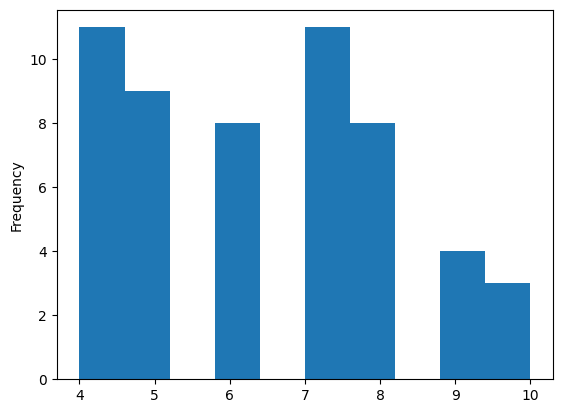

In [ ]:
df["game"].plot.hist(); # histogram

Что показывает этот график? Он показывает, сколько студентов получили те или иные оценки. По гистограмме видно, что больше всего по этому курсу оценок 4 и 7.

Можно поменять цвет гистограммы:

<Axes: ylabel='Frequency'>

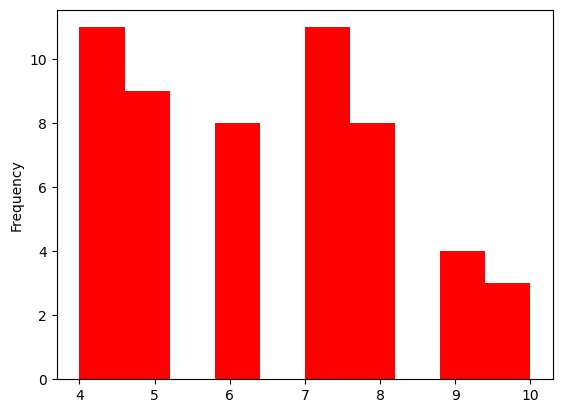

In [ ]:
df["game"].plot.hist(color = "red")

А также поменять число столбцов и цвет границ столбцов:

<Axes: ylabel='Frequency'>

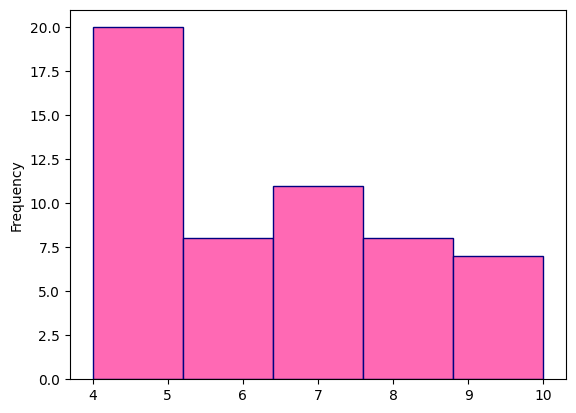

In [ ]:
df["game"].plot.hist(color = "hotpink",
                     bins = 5,
                     edgecolor = 'navy')

Можно пытаться строить другие графики. Например, построить ящик с усами (свеча).

<Axes: >

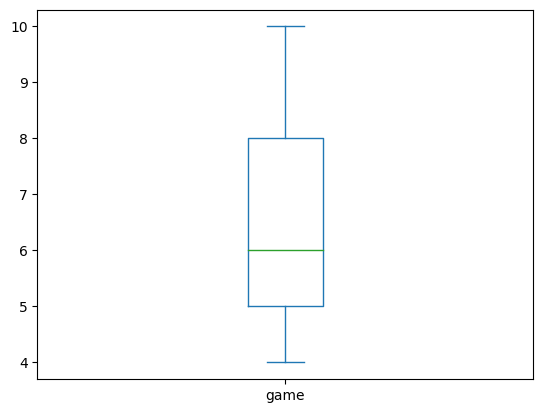

In [ ]:
df["game"].plot.box() # boxplot

Этот график визуализирует основные описательные статистики переменной и отображает форму её распределения. Нижняя граница ящика – это нижний квартиль, верхняя – верхний квартиль, линия внутри ящика – медиана. Усы графика могут откладываться по-разному: если в переменной встречаются нетипичные значения (выбросы), то границы усов совпадают с границами типичных значений, если нетипичных значений нет, границы усов соответствуют минимальному и максимальному значению переменной.

### Фильтрация строк по условиям

Часто в исследованиях нас не интересует выбор отдельных строк по названию или номеру, мы хотим отбирать строки в таблице согласно некоторому условию (условиям). Другими словами, проводить фильтрацию наблюдений. Для этого интересующее нас условие необходимо указать в квадратных скобках. Выберем из датафрейма `df` строки, которые соответствуют студентам с оценкой по экономике выше 6.

In [ ]:
df[df['econ'] > 6]

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ026,7,10,8,7,10,7,9,8,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8,8,9,9,7.0,7,6.0,10,9,1
М141БПЛТЛ060,7,8,7,7,9,8,8,5,7,5,8,5.0,7,8.0,7,9,1


Почему нельзя было написать проще, то есть `df["Econ"] > 6`? Давайте напишем, и посмотрим, что получится:

In [ ]:
df["econ"] > 6

,econ
id,
М141БПЛТЛ024,True
М141БПЛТЛ031,True
М141БПЛТЛ075,True
М141БПЛТЛ017,True
М141БПЛТЛ069,True
М141БПЛТЛ072,True
М141БПЛТЛ020,False
М141БПЛТЛ026,True
М141БПЛТЛ073,True


Что мы увидели? Просто результат проверки условия, набор из `True` и `False`. Когда мы подставляем это выражение в квадратные скобки, Python выбирает из `df` те строки, где выражение принимает значение `True`.

Все операторы проверки условий работают, как обычно:

In [ ]:
df[df["econ"] == 9] # двойное равенство для равенства

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ008,10,8,8,9,8,10,9,8,9,10,9,8.0,5,5.0,10,4,1


Можно формулировать сложные условия. Выберем студентов с оценкой по экономике от 6 до 8 (8 не включается).

In [ ]:
df[(df["econ"] >= 6) & (df["econ"] < 8)]

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ020,8,7,7,6,9,10,8,8,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ060,7,8,7,7,9,8,8,5,7,5,8,5.0,7,8.0,7,9,1
М141БПЛТЛ040,6,9,8,6,9,7,8,6,9,5,8,5.0,8,5.0,7,10,0
М141БПЛТЛ015,6,9,7,6,9,7,9,4,7,7,7,6.0,7,7.0,10,7,0
М141БПЛТЛ018,7,7,9,7,9,7,8,6,6,7,8,7.0,7,7.0,7,8,0
М141БПЛТЛ049,6,7,6,6,8,6,8,4,8,5,9,6.0,8,5.0,6,8,0
М141БПЛТЛ048,8,6,8,6,9,6,4,4,6,4,8,4.0,6,7.0,7,8,0
М141БПЛТЛ034,6,9,7,6,9,6,8,6,7,6,6,5.0,8,5.0,8,9,0


В качестве символа для одновременного выполнения условий используется оператор `&`. И не забудьте про круглые скобки. А теперь выберем студентов с оценкой по английскому выше 9 и оценкой по праву ниже 9:

In [ ]:
df[(df["eng"] > 9) & (df["law"] < 9)]

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ001,6,7,7,4,10,7,7,6,8,6,8,4.0,6,6.0,4,8,0
М141БПЛТЛ012,6,6,7,4,10,6,5,4,7,5,7,4.0,5,4.0,4,8,1


При формулировании сложных (составных) условий обращайте особое внимание на порядок круглых скобках, потому что, если вы расставите скобки неправильно, результат получится неверный.

Теперь выберем студентов с оценкой по политической истории ниже 5 или с оценкой по истории политических учений ниже 5:

In [ ]:
df[(df["phist"] < 5) | (df["polth"] < 5)] # оператор | для условия или

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ015,6,9,7,6,9,7,9,4,7,7,7,6.0,7,7.0,10,7,0
М141БПЛТЛ036,8,10,7,8,8,6,9,4,8,8,7,6.0,7,6.0,7,8,1
М141БПЛТЛ049,6,7,6,6,8,6,8,4,8,5,9,6.0,8,5.0,6,8,0
М141БПЛТЛ048,8,6,8,6,9,6,4,4,6,4,8,4.0,6,7.0,7,8,0
М141БПЛТЛ035,5,6,7,6,8,5,5,4,6,6,7,5.0,8,7.0,6,7,0
М141БПЛТЛ030,7,6,6,6,7,6,6,4,8,5,5,5.0,8,5.0,7,9,1
М141БПЛТЛ063,5,5,6,4,8,4,4,4,5,4,5,4.0,7,5.0,8,8,0
М141БПЛТЛ064,7,8,6,7,6,6,8,4,6,4,4,4.0,6,5.0,4,7,0
130232038,6,7,6,5,8,4,8,4,8,4,5,5.0,6,4.0,5,6,0


### Группировка и агрегирование: методы `.groupby()` и `.agg()`

Группировка данных - один из самых часто используемых методов при анализе данных. В pandas за группировку отвечает метод .groupby.

In [ ]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Выведем уникальные значения Pclass:

In [ ]:
titanic_df.Pclass.unique()

array([3, 1, 2])

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.groupby(['Sex'])['PassengerId'].count()

,PassengerId
Sex,
female,314
male,577


Также можно подсчитать количество с помощью .agg

Сначала в `.groupby()` мы указали переменную, по которой нужно выполнить группировку, затем в `.agg()` мы указали функцию, которую нужно выполнить.

In [ ]:
titanic_df.groupby(['Sex'])['PassengerId'].agg('count')

,PassengerId
Sex,
female,314
male,577


Необходимо подсчитать, сколько женщин и мужчин выжило, а сколько нет. В этом нам поможет метод .groupby.

In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

А теперь проанализируем в разрезе класса кабины:

In [ ]:
titanic_df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

Или сразу несколько статистик, которые можно указать в `.agg()` в виде списка.

In [ ]:
titanic_df.groupby('Pclass').agg(['mean', 'median']).head() # среднее и медиана

<ipython-input-74-94139d0a36aa>:1: FutureWarning: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  titanic_df.groupby('Pclass').agg(['mean', 'median']).head() # среднее и медиана


PassengerId         Survived               Age            SibSp         \
              mean median      mean median       mean median      mean median   
Pclass                                                                          
1       461.597222  472.0  0.629630    1.0  38.233441   37.0  0.416667    0.0   
2       445.956522  435.5  0.472826    0.0  29.877630   29.0  0.402174    0.0   
3       439.154786  432.0  0.242363    0.0  25.140620   24.0  0.615071    0.0   

           Parch              Fare           
            mean median       mean   median  
Pclass                                       
1       0.356481    0.0  84.154687  60.2875  
2       0.380435    0.0  20.662183  14.2500  
3       0.393075    0.0  13.675550   8.0500

In [ ]:
titanic_df.groupby('Pclass').agg(['mean', 'median'])['Survived'].head() # среднее и медиана

<ipython-input-75-d32e7ccc2859>:1: FutureWarning: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  titanic_df.groupby('Pclass').agg(['mean', 'median'])['Survived'].head() # среднее и медиана


,mean,median
Pclass,,
1,0.629630,1.0
2,0.472826,0.0
3,0.242363,0.0


In [ ]:
titanic_df.groupby('Pclass').agg(['mean', 'median'])['Survived']['mean'].head() # среднее и медиана

<ipython-input-76-8d3f36adbc19>:1: FutureWarning: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  titanic_df.groupby('Pclass').agg(['mean', 'median'])['Survived']['mean'].head() # среднее и медиана


,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


Кроме того, внутри `.agg()` можно указывать свои функции. Например, нас интересует разница между максимальным и минимальным значением. Сначала напишем функцию `my_diff`, которая будет определять такую разность:

In [ ]:
def my_diff(x):
    return max(x) - min(x)

Проверим, как она работает:

In [ ]:
my_diff([4, 6, 8]) # все верно, 8 - 4 = 4

4

Теперь используем эту функцию внутри `.agg()`:

In [ ]:
titanic_df.groupby('Pclass').agg(my_diff)['Age'].head() # везде смотрим на первые 5 строк

<ipython-input-79-f7ba159148b7>:1: FutureWarning: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  titanic_df.groupby('Pclass').agg(my_diff)['Age'].head() # везде смотрим на первые 5 строк


,Age
Pclass,
1,79.08
2,69.33
3,73.58


In [ ]:
titanic_df["New column"] = titanic_df['PassengerId']/2
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New column
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,443.5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,444.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,444.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,445.0


Функция, которая будет принимать на вход столбец, делить все его значения на значения из столбца *New column* и умножать на 100.

In [ ]:
def to_perc(x):
    return x / titanic_df['New column'] * 100

In [ ]:
perc = titanic_df[['Age','Pclass']].apply(to_perc)
perc

,Age,Pclass
0,4400.000000,600.000000
1,3800.000000,100.000000
2,1733.333333,200.000000
3,1750.000000,50.000000
4,1400.000000,120.000000
...,...,...
886,6.087937,0.450958
887,4.279279,0.225225
888,NaN,0.674916
889,5.842697,0.224719


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'New column'],
      dtype='object')

In [ ]:
# rename принимает на вход словарь пар
# старое название : новое название

perc = titanic_df.rename(columns = {'PassengerId':'1', 'Survived':'2', 'Pclass':'3', 'Name':'4', 'Sex':'5', 'Age':'6', 'SibSp':'7',
       'Parch':'8', 'Ticket':'9', 'Fare':'10', 'Cabin':'11', 'Embarked':'12', 'New column':'13'})
perc.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.5


In [ ]:
# axis = 1 - склеивание по столбцам
final = pd.concat([titanic_df, perc], axis = 1)

In [ ]:
final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,4,5,6,7,8,9,10,11,12,13
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.5


In [ ]:
final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'New column', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
      dtype='object')

# Numpy (Дополнительно)

In [ ]:
import numpy as np

NumPy предназначен для выполнения научных вычислений и активно используется не только в качестве самостоятельной библиотеки учеными и преподавателями по всему миру, но и входит в состав многих других популярных пакетов.

Но почему он стал так популярен? Причин несколько. Самое главное, критичные по скорости вычисления фрагменты реализованы на языках Си и Фортран. Также он имеет довольно простой и продуманный синтаксис, а, значит, им легко пользоваться. Ну и, наконец, богатство возможностей этой библиотеки, начиная с базовых математических функций и заканчивая работой с полиномами, линейной алгеброй и многомерными матрицами (тензорами). Все это очень часто используется в инженерных задачах, отсюда и высокая популярность пакета.

### Фундаментальный элемент NumPy – массив (array)

В NumPy элементы массива имеют единый тип данных. Их индексы описываются кортежем целых неотрицательных чисел. Размерность кортежа – это ранг массива (то есть, размерность массива), а каждое число в кортеже представляет свою отдельную ось:

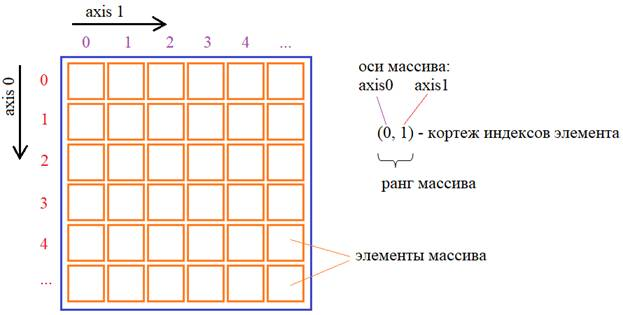


Как создать массив в NumPy? Существует много способов, но базовый реализуется через функцию:

*numpy.array(object, dtype=None, …)*

Здесь в качестве первого параметра object может выступать список или кортеж, а также функция или объект, возвращающий список или кортеж. Второй параметр dtype – это тип элементов массива. Если указано значение None, то тип будет определяться автоматически на основе переданных данных.

In [ ]:
a = np.array([1, 2, 3, 4])

В результате получим объект типа array с элементами 1, 2, 3, 4:

Какой будет тип у этих элементов? Мы можем его посмотреть с помощью атрибута dtype, выполнив в консоли строчку:

In [ ]:
a.dtype

dtype('int64')

In [ ]:
a = np.array([1, 2, "3", True])
a.dtype

dtype('<U21')

Все элементы стали строкового типа. Этот пример показывает, что в массивах NumPy используется единый тип данных его элементов: или все целочисленные, или строковые, или вещественные и так далее. Смешение типов в рамках одного массива не допускается.

Например, для нашего одномерного случая, мы можем взять первый элемент из массива a, следующим образом:

In [ ]:
a[0]

'1'

In [ ]:
a[1] # возвращает 2-й элемент со значением '2'

'2'

Для изменения значения элемента, достаточно присвоить ему новое значение, например:

In [ ]:
a[1] = '123'

А что будет, если мы попробуем присвоить значение другого типа данных, например, число:

In [ ]:
a[1] = 234

### Удобство

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9])

Мы уже знаем как взять один отдельный элемент, но что будет, если прописать индексы для всех 9 элементов:

In [ ]:
a[ [1,1,1,1,1,1,1,1,1] ]

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
a[ [1,1,1,1,1] ]

array([2, 2, 2, 2, 2])

тогда получим аналогичный массив, но размерностью 5 элементов:

Как видите, индексирование здесь более гибкое, чем у обычных списков Python. Или, вот еще один характерный пример:

In [ ]:
a[ [True, True, False, False, False, False, True, True, True] ]

array([1, 2, 7, 8, 9])

То есть, остаются элементы со значениями True и отбрасываются со значениями False.

Еще один пример. Предположим, нам понадобилось представить одномерный массив a в виде матрицы 3х3. Нет ничего проще, меняем его размерность:

In [ ]:
b = a.reshape(3, 3)
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Далее, можем обращаться к элементам матрицы b так:

In [ ]:
b[1][2]

6

или так:

In [ ]:
b[1, 2]

6

### Объявление многомерных массивов

Требуется определить матрицу, размерностью 3x2 элемента. Это можно сделать так:

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

если указать не прямоугольный двумерный список, например, так:

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6, 7]])
a

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

то при создании двумерной матрицы будет выдана ошибка. Матрицы должны содержать определенное число столбцов и строк, то есть, быть прямоугольной таблицей чисел. Здесь же мы передаем третьей строкой список из трех элементов и это приводит к ошибке.

Далее, если требуется объявить трехмерную матрицу, то это будет выглядеть уже так:

In [ ]:
b = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])
b

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [ ]:
b[0][0][0]

1

### Расположение осей многомерного массива

И здесь главный вопрос: как располагаются оси многомерных массивов?Ответ вполне очевиден. Вдоль первой оси (axis0) для трехмерного массива будут располагаться двумерные срезы (матрицы), а остальные две оси (axis1 и axis2) будут определять строки и столбцы этих двумерных матриц:

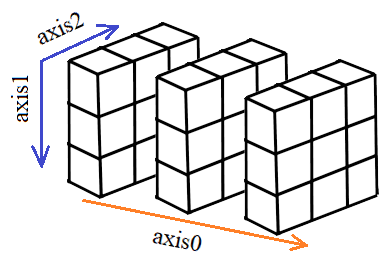

Например, выполнив в консоли команду, увидим первый двумерный срез трехмерного массива:

In [ ]:
b[0]

array([[1, 2],
       [3, 4]])

Если указать первые два индекса, то увидим первую строку первого среза:



In [ ]:
b[0, 0]

array([1, 2])

указав все три индекса, получим первый элемент трехмерной матрицы:

In [ ]:
b.shape

(3, 2, 2)

In [ ]:
b[0, 0, 0]

1

Из этих примеров хорошо видно, что первый индекс отвечает за первую ось, второй – за вторую, ну а третий – за третью. Что вполне логично. Если размерность массива увеличивается до четырех, пяти и так далее осей, то принцип индексирования сохраняется: мы также указываем требуемый индекс элемента в виде кортежа чисел, где местоположение каждого числа определяет ось, по которой берется тот или иной индекс.

### Функции формирования числовых диапазонов

Функция range(Start, Stop, Step) генерирует числовой диапазон с параметрами Start, Stop, Step. Причем, все эти параметры должны быть целочисленными. В NumPy есть подобные функции, но более гибкие и работающие с вещественными величинами.

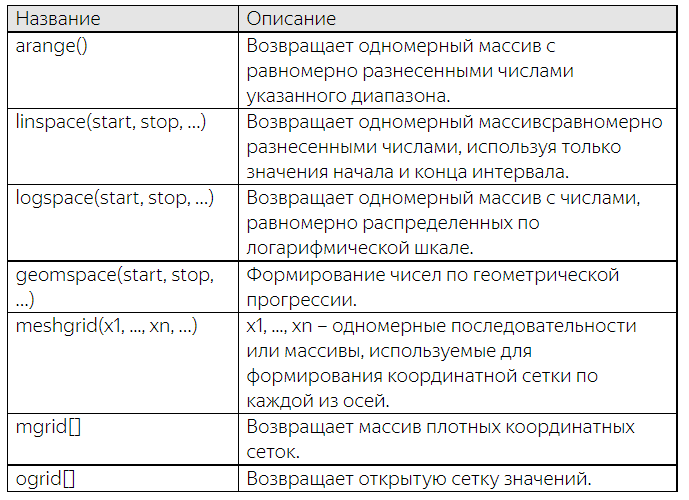

Давайте рассмотрим некоторые из них. Первая функция arrange довольно часто применяется в программах на Python. Она позволяет проходить заданный интервал с указанным шагом, например, так:

In [ ]:
np.arange(5)# интервал [0; 5) с шагом 1

array([0, 1, 2, 3, 4])

In [ ]:
np.arange(1, 5)# интервал [1; 5) с шагом 1

array([1, 2, 3, 4])

In [ ]:
np.arange(1, 5, 0.5) # интервал [1; 5) с шагом 0,5

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

Похожим образом работает и функция linspace. Она разбивает указанный интервал на равномерные отрезки и возвращает массив этих значений:

Мы указываем в качестве аргументов интервал [start; stop] и число отметок в этом интервале n. Если n = 0, то получим пустой массив. При n = 1 – значение start. При n = 2 – значения start и stop. При n> 2 равномерное разбиение интервала точками m = n-2. Например:

In [ ]:
np.linspace(0, np.pi, 0) # пустой массив

array([], dtype=float64)

In [ ]:
np.linspace(0, np.pi, 1) # одно значение 0

array([0.])

In [ ]:
np.linspace(0, np.pi, 2) # два значения: 0 и pi

array([0.        , 3.14159265])

In [ ]:
np.linspace(0, np.pi, 8) # три значения: 0, pi/2, pi

array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
       2.24399475, 2.6927937 , 3.14159265])

В чем отличие linspace от arange? В arange мы указываем сами шаг движения по числовой оси. При этом число значений определяется граничными значениями. А в linspace мы задаем граничные значения и число делений, а шаг вычисляется автоматически.

Функции logspace и geomspace работают аналогичным образом. У них указываются граничные значения и число членов, а на выходе имеем массив из соответствующих величин. Например:

In [ ]:
np.logspace(0, 1, 3) # значения: 1, sqrt(10), 10

array([ 1.        ,  3.16227766, 10.        ])

In [ ]:
np.logspace(0, 1, 4) # значения: 1, 2.15, 4.64, 10

array([ 1.        ,  2.15443469,  4.64158883, 10.        ])

In [ ]:
np.geomspace(1, 4, 3) # значения: 1, 2, 4

array([1., 2., 4.])

In [ ]:
np.geomspace(1, 16, 5) # значения: 1, 2, 4, 8, 16

array([ 1.,  2.,  4.,  8., 16.])

### Индексация и срезы многомерных массивов

В базовом варианте индексация и срезы многомерных массивов работают также как и в одномерных, только индексы указываются для каждой оси. Например, объявим двумерный массив:

In [ ]:
x = np.array([(1, 2, 3), (10, 20, 30), (100, 200, 300)])

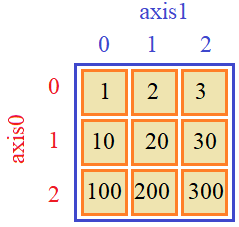

Для обращения к центральному значению 20 нужно выбрать вторую строку и второй столбец, имеем:

In [ ]:
x[1, 1] # значение 20

20

Чтобы взять последнюю строку и последний столбец, можно использовать отрицательные индексы:

In [ ]:
x[-1, -1] # значение 300

300

Если же указать только один индекс, то получим строку:

In [ ]:
x[0] # array([1, 2, 3])

array([1, 2, 3])

Эта запись эквивалентна следующей:

In [ ]:
x[0, :] # array([1, 2, 3])

array([1, 2, 3])

То есть, не указывая какие-либо индексы, NumPy автоматически подставляет вместо них полные срезы.

Для извлечения столбцов мы уже должны явно указать полный срез в качестве первого индекса:

In [ ]:
x[:,1] # array([  2,  20, 200])

array([  2,  20, 200])

Итерирование двумерных массивов можно выполнять с помощью вложенных циклов, например:

In [ ]:
for row in x:
    for val in row:
        print(val, end=' ')
    print()

1 2 3 
10 20 30 
100 200 300 


Если же необходимо просто перебрать все элементы многомерного массива, то можно использовать свойство flat:

In [ ]:
for val in x.flat:
    print(val, end=' ')

1 2 3 10 20 30 100 200 300 

У массивов более высокой размерности картина индексации, в целом выглядит похожим образом. Например, создадим четырехмерный массив:

In [ ]:
a = np.arange(1, 82).reshape(3, 3, 3, 3)

Тогда для обращения к конкретному элементу следует указывать четыре индекса:

In [ ]:
a[1, 2, 0, 1] # число 47

47

Для выделения многомерного среза, можно использовать такую запись:

In [ ]:
a[:, 1, :, :] # матрица 3x3x3

array([[[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[37, 38, 39],
        [40, 41, 42],
        [43, 44, 45]],

       [[64, 65, 66],
        [67, 68, 69],
        [70, 71, 72]]])

или, так:

In [ ]:
a[0, 0] # двумерная матрица 3x3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Это эквивалентно записи:

In [ ]:
a[0, 0, :, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Если же нужно задать два последних индекса, то полные срезы у первых двух осей указывать обязательно:

In [ ]:
a[:, :, 1, 1] # матрица 3x3
a[0:2, 0:2, 1, 1] # матрица 2x2

array([[ 5, 14],
       [32, 41]])

Пакет NumPy позволяет множество полных подряд идущих срезов заменять троеточиями. Например, вместо a[:, :, 1, 1] можно использовать запись:

In [ ]:
a[..., 1, 1] # эквивалент a[:, :, 1, 1]

array([[ 5, 14, 23],
       [32, 41, 50],
       [59, 68, 77]])

Это бывает удобно, когда у массива много размерностей и нам нужны последние индексы.

### Базовые математические операции над массивами

In [ ]:
lst = [1, 2, 3]
a = np.array([1, 2, 3])

In [ ]:
lst*2 # список: [1, 2, 3, 1, 2, 3]

[1, 2, 3, 1, 2, 3]

In [ ]:
a*2 # массив: array([2, 4, 6])

array([2, 4, 6])

при умножении списка языка Python, он дублируется дважды, а при умножении на NumPy массив – каждый его элемент умножается математически на число 2. Если бы мы захотели то же самое реализовать непосредственно на Python, оперируя списками, то пришлось бы делать что-то вроде:

In [ ]:
[x*2 for x in lst]

[2, 4, 6]

Но выполнялась бы такая конструкция дольше, чем в случае с массивом NumPy. Именно благодаря удобству и скорости библиотека NumPy и приобрела свою популярность.

Итак, с массивами NumPy мы можем выполнять все базовые математические операции:

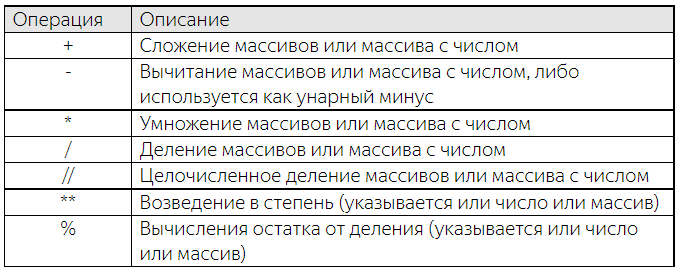

In [ ]:
a = np.array([1, 2, 3])

In [ ]:
print(-a) # унарный минус
print(a + 2) # сложение с числом
print(2 + a ) # так тоже можно записывать
print(a - 3) # вычитание с числом
print(a * 5) # умножение на число
print(a / 5)  # деление на число
print(a // 2)  # целочисленное деление
print(a ** 3)  # возведение в степень 3
print(a % 2)  # вычисление по модулю 2

[-1 -2 -3]
[3 4 5]
[3 4 5]
[-2 -1  0]
[ 5 10 15]
[0.2 0.4 0.6]
[0 1 1]
[ 1  8 27]
[1 0 1]


In [ ]:
b = np.array([3, 4, 5])

In [ ]:
print(a - b)  # array([-2, -2, -2])
print(b + a)  # array([4, 6, 8])
print(a * b)  # array([ 3,  8, 15])
print(b / a)  # array([3. , 2. , 1.66666667])
print(b // a) # array([3, 2, 1], dtype=int32)
print(b ** a) # array([  3,  16, 125], dtype=int32)
print(b % a)  # array([0, 0, 2], dtype=int32)

[-2 -2 -2]
[4 6 8]
[ 3  8 15]
[3.         2.         1.66666667]
[3 2 1]
[  3  16 125]
[0 0 2]


Везде мы видим поэлементные операции. Соответственно, чтобы они выполнялись, массивы должны быть согласованы по длине. Например, если взять массив:

In [ ]:
b = np.array([3, 4, 5, 6])

In [ ]:
a + b  # ошибка: длины массивов не совпадают

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

то возникнет ошибка из-за несовпадения длин массивов. Но вот такая операция с двумерным массивом b сработает:

In [ ]:
a

array([1, 2, 3])

In [ ]:
b

array([3, 4, 5, 6])

In [ ]:
b = np.arange(1, 7)
b.resize(2, 3)
a + b

array([[2, 4, 6],
       [5, 7, 9]])

В этом случае массив a будет применен к каждой строке массива b и на выходе увидим результат:

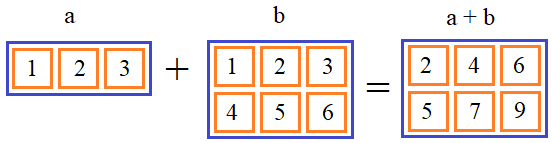

Все рассмотренные операции можно распространить и на многомерные массивы, главное, чтобы они были согласованы по размерам.

In [ ]:
a = np.arange(1, 19)
a.resize(3, 3, 2)
b = np.ones((3, 2))

С ними можно выполнять такие очевидные операции:

In [ ]:
print(a - b)
print(a * 10)
print(a // b)

[[[ 0.  1.]
  [ 2.  3.]
  [ 4.  5.]]

 [[ 6.  7.]
  [ 8.  9.]
  [10. 11.]]

 [[12. 13.]
  [14. 15.]
  [16. 17.]]]
[[[ 10  20]
  [ 30  40]
  [ 50  60]]

 [[ 70  80]
  [ 90 100]
  [110 120]]

 [[130 140]
  [150 160]
  [170 180]]]
[[[ 1.  2.]
  [ 3.  4.]
  [ 5.  6.]]

 [[ 7.  8.]
  [ 9. 10.]
  [11. 12.]]

 [[13. 14.]
  [15. 16.]
  [17. 18.]]]


И так далее. Причем, двумерный массив b может быть применен к трехмерному массиву a благодаря операции транслирования, так как их размеры согласованы. На самом деле, умножение трехмерного массива на число также реализуется через транслирование числа по всем элементам массива a.

Все представленные математические операции имеют следующие расширенные аналоги:

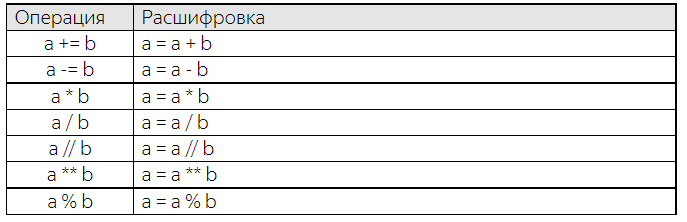

In [ ]:
a = np.array([1, 2, 6, 8])
a += 5
b = np.ones(4)
b *= a

In [ ]:
a

array([ 6,  7, 11, 13])

In [ ]:
b

array([ 6.,  7., 11., 13.])

И так далее. Но есть один нюанс работы этих операторов. Если, например, массив b определить с типом данных float64:

In [ ]:
b = np.ones(4, dtype='float64')

а массив a имеет тип int32 (можно посмотреть через свойство a.dtype), то операция:

In [ ]:
a += b

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

приведет к ошибке. С чем это связано? Дело в том, что результатом сложения вещественного числа с целочисленным, итоговое значение представляет собой вещественное число. Но тип данных массива a – целочисленный и он не может сохранять вещественные числа. Отсюда и возникает эта ошибка. Вообще, следует помнить правило:

При выполнении арифметических операций тип данных автоматически приводится к более общему.

То есть, при работе с целочисленными и вещественными числами на выходе получаем вещественные. При работе с вещественными и комплексными – комплексные. И так далее. Всегда результатом имеем более общий тип данных.

Все описанные математические операции можно комбинировать и записывать в виде:

In [ ]:
(a + b)*5 - 10

array([25., 30., 50., 60.])

Здесь круглые скобки, как и в математике, операция изменения приоритетов, то есть, сначала будет выполнено сложение, затем, умножение и в последнюю очередь вычитание.

### Транспонирование матриц и векторов

Очень часто в математических операциях требуется выполнять транспонирование матриц и векторов, то есть, заменять строки на столбцы. Например, если имеется матрица (двумерный массив):

In [ ]:
a = np.array([(1, 2, 3), (1, 4, 9), (1, 8, 27)])
a

array([[ 1,  2,  3],
       [ 1,  4,  9],
       [ 1,  8, 27]])

то операция транспонирования может быть реализована так:

In [ ]:
b = a.T
b

array([[ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]])

Обратите внимание, мы здесь создаем лишь новое представление тех же самых данных массива a. И изменение элементов в массиве b:

In [ ]:
b[0, 1] = 10
b

array([[ 1, 10,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]])

In [ ]:
a=a.reshape(-1,1)
a

array([[ 1],
       [ 2],
       [ 3],
       [10],
       [ 4],
       [ 9],
       [ 1],
       [ 8],
       [27]])

приведет к соответствующему изменению значения элемента и массива a. Это следует помнить, используя операцию транспонирования.

Транспонирование векторов работает несколько иначе. Предположим, имеется одномерный массив:

In [ ]:
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x=x.reshape(1,-1)
x.T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

и мы выполняем операцию транспонирования:

In [ ]:
x.T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

В результате ничего не изменилось: вектор как был строкой, так строкой и остался. Почему? Дело в том, что массив x имеет только одну размерность, поэтому здесь нет понятия строк и столбцов. Соответственно, операция транспонирования ни к чему не приводит. Чтобы получить ожидаемый эффект, нужно добавить к массиву еще одну ось, например, так

In [ ]:
x.shape = 1, -1
x

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

И теперь, при транспонировании получим вектор-столбец:

In [ ]:
x.T # вектор-столбец 9x1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

### Функции hstack и vstack

In [ ]:
a = np.array([(1, 2), (3, 4)])
b = np.array([(5, 6), (7, 8)])

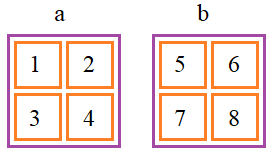

Их можно объединить как по горизонтали, так и по вертикали, с помощью функций:

In [ ]:
np.hstack([a, b])  # объединение по оси axis1 (размерность 2x4)
np.vstack([a, b])  # объединение по оси axis0 (размерность 4x2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
np.hstack([a, b])

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

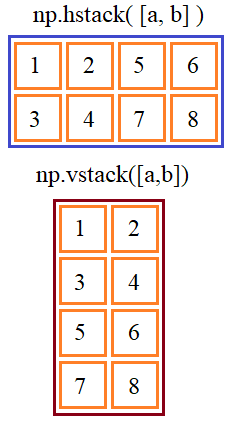

Эти же операции можно выполнять и с многомерными массивами. Например, определим два трехмерных массива:

In [ ]:
a = np.fromiter(range(18), dtype='int32')
b = np.fromiter(range(18, 36), dtype='int32')
a.resize(3, 3, 2)
b.resize(3, 3, 2)

И выполним функции:

In [ ]:
c = np.hstack([a, b])  # размерность 3x6x2
d = np.vstack([a, b])  # размерность 6x3x2

In [ ]:
c

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11],
        [24, 25],
        [26, 27],
        [28, 29]],

       [[12, 13],
        [14, 15],
        [16, 17],
        [30, 31],
        [32, 33],
        [34, 35]]], dtype=int32)

In [ ]:
d

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35]]], dtype=int32)

Как видите, здесь произошло формальное объединение по оси axis1 в функции hstack и по оси axis0 в функции vstack.

Разумеется, чтобы эти функции работали, размерность массивов по объединяемым осям должны совпадать.

Аналогичным образом происходит объединение и одномерных массивов:

In [ ]:
a = np.fromstring('1 2 3 4', sep = ' ')
b = np.fromstring('5 6 7 8', sep = ' ')

И при выполнении:

In [ ]:
np.hstack([a, b])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
np.vstack([a, b])

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

### Булевы операции и функции, значения inf и nan

In [ ]:
a = np.array([1, 2, 3, 10, 20, 30])

In [ ]:
indx = a > 5
a[indx]

array([10, 20, 30])

In [ ]:
b = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
a == b    # array([ True,  True,  True, False, False, False])
a >= b    # array([ True,  True,  True,  True,  True,  True])
a <= b    # array([ True,  True,  True, False, False, False])
a != b    # array([False, False, False,  True,  True,  True])

array([False, False, False,  True,  True,  True])

Вместо записи операторов в NumPy имеются функции сравнения: greater(), less() и equal().


greater(a, b) – выполняет сравнение a > b;

less(a, b) – выполняет сравнение a < b;

equal(a, b) – выполняет сравнение a == b.

In [ ]:
np.greater(a, b)
np.less(a, b)
np.equal(a, b)

array([ True,  True,  True, False, False, False])

Но, чаще всего на практике вместо них записывают булевы операторы: >, <, ==.

Для такого сравнения массивов необходимо получать только одно значение True или False, а не объект array. Для этого в пакете NumPy существуют специальная функция np.array_equal(), которую можно применить так:

In [ ]:
if np.array_equal(a, b):
     print("a == b")

Это условие сработает, если оба массива a и b содержат одинаковые значения элементов и равны по длине.

Если нам нужно определить, что хотя бы один элемент массива удовлетворяет указанному условию, то можно воспользоваться функцией any(), например:

In [ ]:
# для массива a = array([ 1,  2,  3, 10, 20, 30])
np.any(a > 5)    # True
np.any(a == 5)    # False
np.any(a == b)    # True

True

Если же нужно узнать, все ли элемента массива удовлетворяют условию, то используется функция all():

In [ ]:
np.all(a > 5)       # False
np.all(a > 0)       # True
np.all(a == b)     # False

False

### Значения -inf, inf и nan

Пакет NumPy реализован максимально дружественным способом и там, где можно избежать ошибок и продолжить вычисления, он это делает.

In [ ]:
a/0

<ipython-input-185-deacdc4ccabc>:1: RuntimeWarning: divide by zero encountered in divide
  a/0


array([inf, inf, inf, inf, inf, inf])

Здесь NumPy нас лишь предупредил, что встретилось деление на ноль, но расчеты были завершены и все элементы равны inf.

Что это за значение inf? Это сокращение от английского слова infinity – бесконечность. Действительно, при делении на 0 получаем бесконечность. Именно это и указано в значениях элементов массива. Благодаря использованию этого специального значения, NumPy избежал ошибки деления на 0. Причем, inf – это полноценный элемент массивов. Его можно непосредственно задать при определении:

In [ ]:
b = np.array([1, 2, np.inf])

In [ ]:
b

array([ 1.,  2., inf])

И, далее, он может участвовать в вычислениях. Например, умножим b на ноль и посмотрим, что получится:

In [ ]:
b*0 # array([ 0.,  0., nan])

<ipython-input-188-f948accd709f>:1: RuntimeWarning: invalid value encountered in multiply
  b*0 # array([ 0.,  0., nan])


array([ 0.,  0., nan])

Так как элементы inf и nan не относятся к числам, то для их идентификации, проверки, что текущий элемент массива принимает одно из этих значений, существуют функции isnan() и isinf(). Они возвращают True, если элемент равен nan и inf и False – в противном случае. Посмотрим как можно их использовать в программе. Пусть имеется массив:

In [ ]:
b = np.array([1, 2, np.nan, np.inf, -np.inf])

к которому применим эти две функции:

In [ ]:
np.isinf(b)  # array([False, False, False,  True,  True])
np.isnan(b)  # array([False, False,  True, False, False])

array([False, False,  True, False, False])

Часто, при работе с массивами требуется определить: являются ли его элементы конечными числами. Для этого используется еще одна функция – isfinit():

In [ ]:
# для массива b = np.array([1, 2, np.nan, np.inf, -np.inf])
np.isfinite(b) # array([ True,  True, False, False, False])

array([ True,  True, False, False, False])

Аналогично работает функция isreal():

In [ ]:
np.isreal(a)

array([ True,  True,  True,  True,  True,  True])

В NumPy можно выполнять стандартные булевы операции И, ИЛИ, НЕ, исключающее ИЛИ, применительно к данным массивов. Например, зададим два массива так, чтобы попарно элементы образовывали все возможные комбинации:

In [ ]:
X = np.array([True, False, True, False])
Y = np.array([True, True, False, False])

In [ ]:
np.logical_and(X, Y) # логическое И
np.logical_or(X, Y) # логическое ИЛИ
np.logical_not(X) # логическое НЕ
np.logical_xor(X, Y) # XOR

array([False,  True,  True, False])

In [ ]:
a = np.array([1, 0, 2, 0])
b = np.array([3, 4, 0, 0])

In [ ]:
np.logical_and(a, b) # array([ True, False, False, False])

array([ True, False, False, False])

# Визуализация

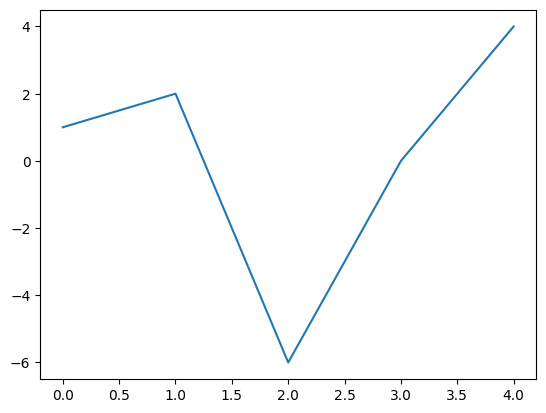

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, -6, 0, 4])
plt.show()

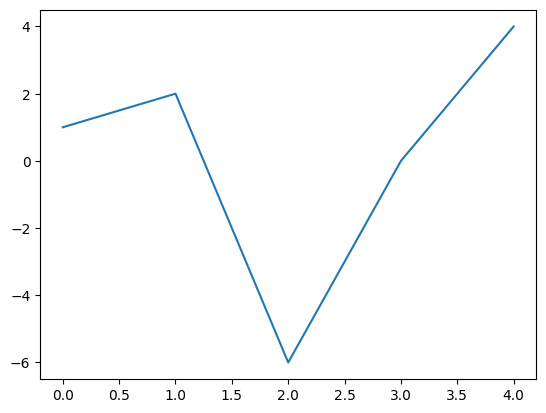

In [ ]:
y = np.array([1, 2, -6, 0, 4])
plt.plot(y)

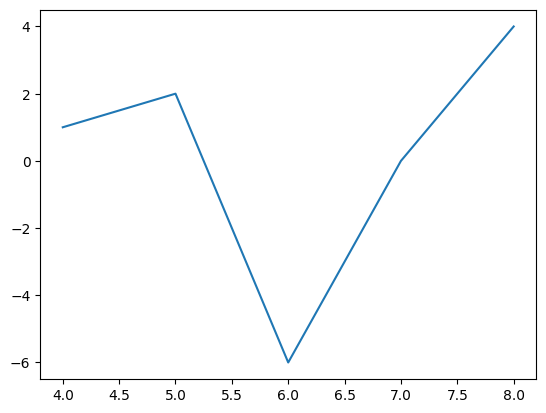

In [ ]:
x = np.array([4, 5, 6, 7, 8])
y = np.array([1, 2, -6, 0, 4])
plt.plot(x, y)

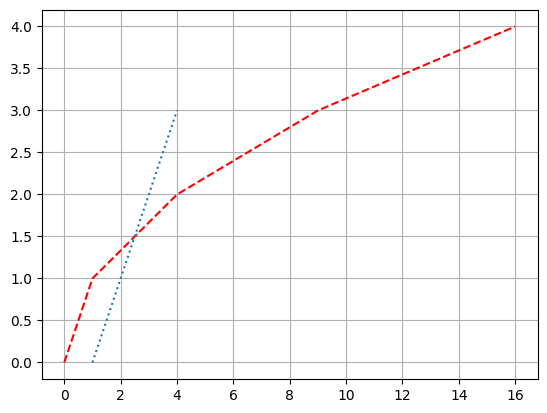

In [ ]:
y = np.arange(0, 5, 1)             # [0, 1, 2, 3, 4]
x = np.array([a*a for a in y])   # [ 0,  1,  4,  9, 16]
y2 = [0, 1, 2, 3]
x2 = [i+1 for i in y2]
plt.grid()
plt.plot(x, y, '--',color='r')
plt.plot(x2, y2, ':')

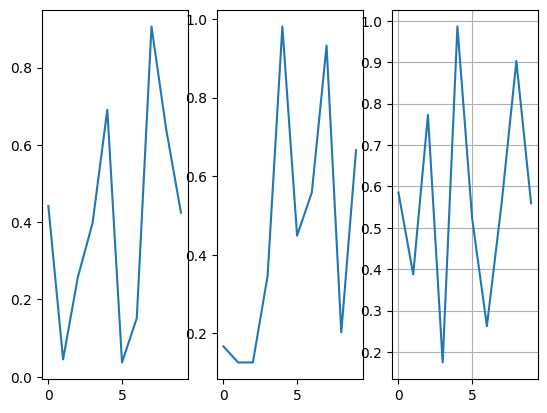

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.plot(np.random.random(10))
plt.subplot(1, 3, 2)
plt.plot(np.random.random(10))
plt.subplot(1, 3, 3)
plt.plot(np.random.random(10))
plt.grid()
plt.show()

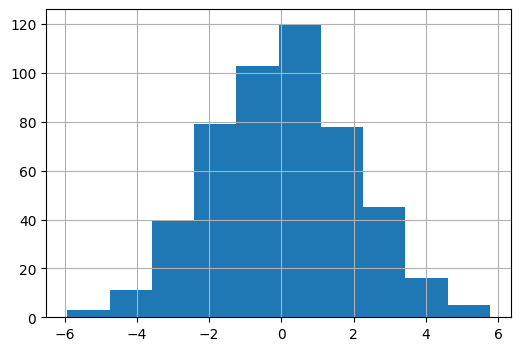

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

y = np.random.normal(0, 2, 500)
ax.hist(y)
ax.grid()

plt.show()

<BarContainer object of 10 artists>

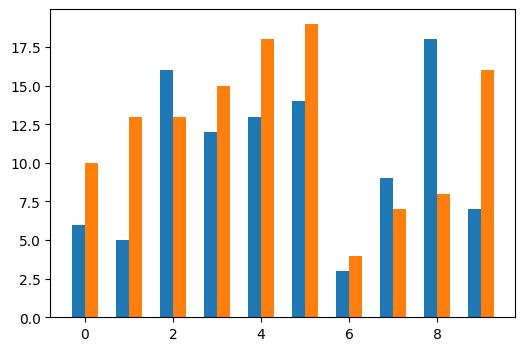

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
x = np.arange(10)
y1 = np.random.randint(3, 20, len(x))
y2 = np.random.randint(3, 20, len(x))
w = 0.3
ax.bar(x - w/2, y1, width=w)
ax.bar(x + w/2, y2, width=w)

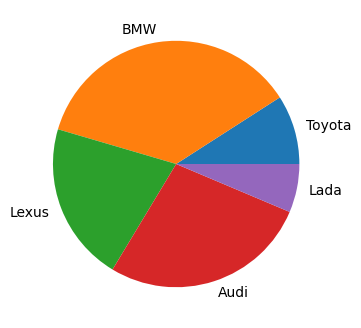

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [10, 40, 23, 30, 7]
labels = ['Toyota', 'BMW', 'Lexus', 'Audi', 'Lada']
ax.pie(vals, labels=labels)
plt.show()

# Полезные библиотеки

* **Pandas** - структуры данных и инструменты анализа
* **NumPy** - универсальный пакет для обработки массивов
* **Matplotlib** - широкий спектр визуализаций
* **Seaborn** - это расширение Matplotlib с дополнительными возможностями
* **Statsmodels** - обеспечивает простые вычисления для описательной статистики и оценки и формирования статистических моделей
* **SciPy** - модули для эффективных математических процедур, таких как линейная алгебра, интерполяция, оптимизация, интеграция и статистика
* **Scikit Learn** - библиотека машинного обучения
* **OpenCV** - компьютерное зрение
* **TensorFlow, Keras, PyTorch** - нейронные сети